# Machine Learning Exercise

Choose one of machine learning method and build a classifier on the iris data set. 

Step 1: Load data set.

(Hint: in this step, you import the needed packages, such as numpy, matplotlib, pandas and seaborn. Load data to a `DataFrame` object. Check the dataframe object properties, such as shape and head rows.

In [1]:
# Your code starts here
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.metrics import accuracy_score, classification_report, SCORERS
%matplotlib inline


# iris = pd.read_csv('Common Machine Learning Models/iris.csv',
#                    names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris = pd.DataFrame(load_iris().data).rename(columns={0: "sepal length", 1: "sepal width", 2: "petal length", 3: "petal width"})

iris['class'] = load_iris().target
iris = iris.replace({'class':{0:'setosa', 1: 'versicolor', 2:'virginica'}})
print(iris.shape)
print('\n', iris.head())


(150, 5)

    sepal length  sepal width  petal length  petal width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Step 2: Check every column's information in the `iris` DataFrame.

(Hint: `DataFrame.info()` is very useful to know column information.)

In [2]:
# Your code starts here
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To play safe, you can do a survey to check whether there is any `NaN` data in data set.

In [3]:
# Your code starts here
if not iris.isnull().values.any():
    print("There are no NaN Values")
else:
    print("There are NaN values")

There are no NaN Values


Step 3: Do a quick descriptive summary statistics

In [4]:
# Your code starts here
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


And count the unique data to know the numer of classes of iris flowers.

In [5]:
# Your code starts here
iris['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Step 4. Explore the data by visulization.

The easiest way is to plot pairplot to check data distribution on a two-diemensional space.

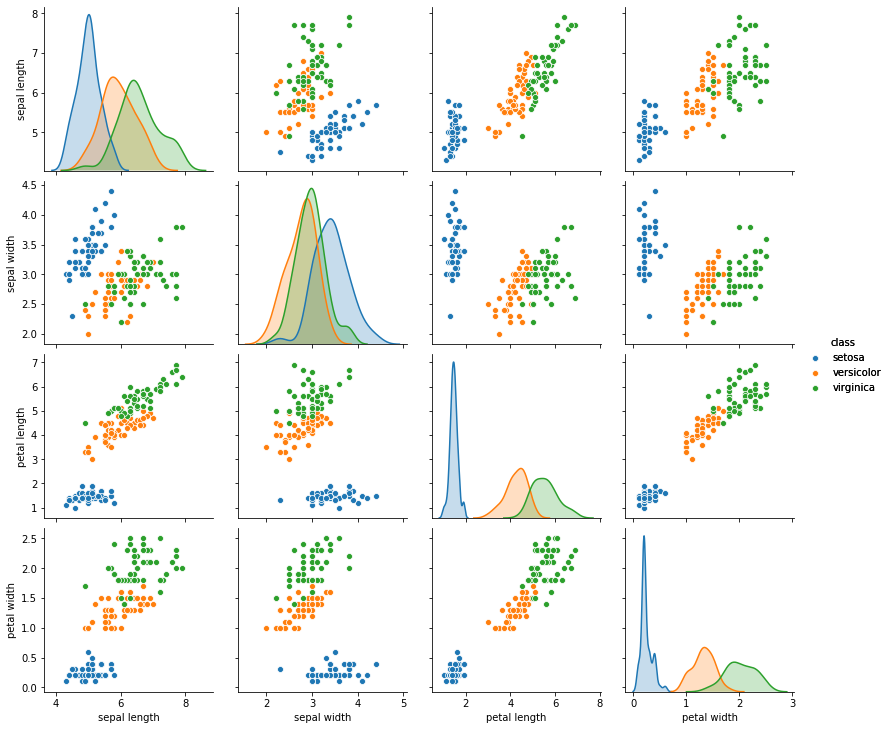

In [6]:
# Your code starts here
graph = sns.pairplot(iris, hue="class")
graph.add_legend()

Also, it is important to know the correlation among attributes in data


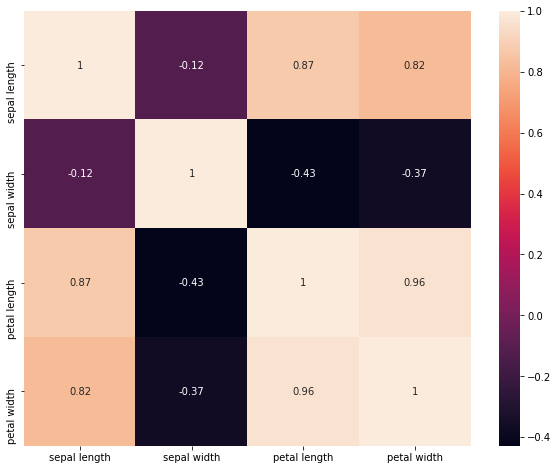

In [7]:
# Your code starts here
plt.figure(figsize=(10, 8))
ax = sns.heatmap(iris.corr(), annot=True)

Step 5. split the data into train and validation set and then standardize the data



In [8]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
X = iris.loc[:, features].to_numpy()

# Separating out the target
y = iris.loc[:, ['class']].to_numpy()

# Standardizing the features
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020)

Step 6: Use PCA to reduce feacture space.

In [9]:

pca = PCA(.95)  # 95% of variance is retained

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)
y_train = y_train.reshape(len(X_train),)
y_test = y_test.reshape(len(X_test),)

print(y_train.shape)

(120, 2)
(30, 2)
(120,)


Step 7: Construct a classifier, here we use logistic regression algorithm:
(You can choose other algorithm too.)

In [10]:
# Your code starts here
logReg_clf = LogisticRegression(max_iter=100000)

logReg_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Step 8: Model validation: accuracy_score, confusion matrix and others

Firstly, write a your own general function to evaluate the model, the function should report accuracy, confusion matrix, and evaluation report.

In [11]:
# Your code starts here
def evaluator(model, test_features, test_labels):
    predictions = model.predict(test_features)

    print('Model Performance', "\n")
    score = accuracy_score(test_labels, predictions)
    print('Accuracy: ', round(score, 5), "\n")

    # evaluate the classifier by confusion matrix
    confusion_matrix = pd.crosstab(test_labels, predictions,
                                   rownames=['Actual'], colnames=['Predicted'])

    print(confusion_matrix)
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix, annot=True)
    print('\nClassification Report:')
    print(classification_report(test_labels, predictions))

Now, call the function to evaluate the basic model

Model Performance 

Accuracy:  0.83333 

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          10           0          0
versicolor       0           9          1
virginica        0           4          6

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.69      0.90      0.78        10
   virginica       0.86      0.60      0.71        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



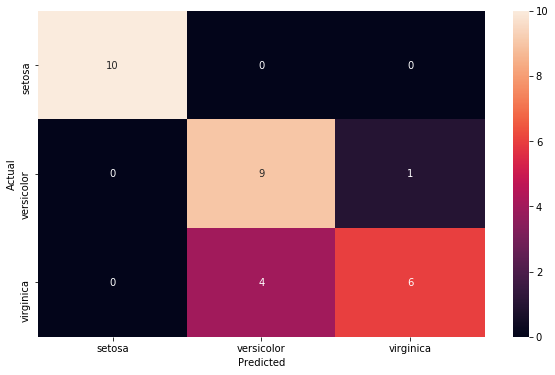

In [12]:
# Your code starts here
evaluator(logReg_clf, X_test, y_test)

Step 9: Use grid search to tune hyperparameters.
(You can either choose to use general procedure or algorithm dependent grid search and cross validation method.)

Best C_ values:  [21.5443469 21.5443469 21.5443469]
Model Performance 

Accuracy:  0.93333 

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          10           0          0
versicolor       0           9          1
virginica        0           1          9

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



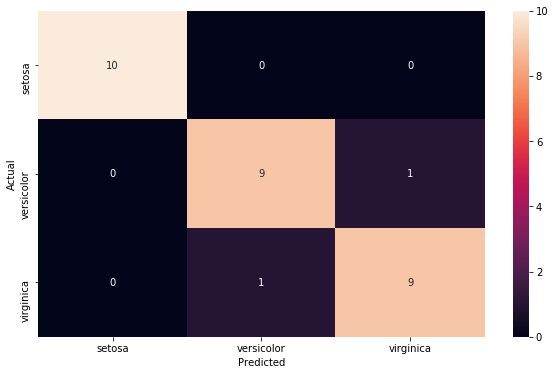

In [13]:
n_folds=10
logreg_cv = LogisticRegressionCV(solver='lbfgs', max_iter=10000, random_state= 10, cv=n_folds)
logreg_cv.fit(X_train, y_train)

print("Best C_ values: ", logreg_cv.C_)  
y_new_pred = logreg_cv.predict(X_test) 

evaluator(logreg_cv, X_test, y_test)

#### A step further:

Please try to build a pipeline to include data-preprocessing and grid search for hyperparameter.